## Pandas


In [102]:
import pandas as pd
import numpy as np

In [103]:
data = pd.read_csv("NationalNames.csv")
data

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


### 1.Output the first 8 rows of the dataset.

In [104]:
data[:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


### 2.Output the last 8 rows of the data set.

In [105]:
data[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


### 4.Get general information about the data in the dataset.

In [106]:
data.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


### 5.Find the number of unique names in the data set

In [107]:
data["Name"].nunique()

93889

### 6.Calculate the total number of unique female and male names data set

In [108]:
data[["Name","Gender"]].groupby("Gender").nunique()

,Name
Gender,
F,64911
M,39199


### 9.Count the number of records for which Count is the minimum in the set.

In [109]:
most_unique_count = data.groupby('Count')['Name'].nunique().idxmin()
data.groupby("Count").count()

,Id,Name,Year,Gender
Count,,,,
5,254615,254615,254615,254615
6,181502,181502,181502,181502
7,137015,137015,137015,137015
8,108297,108297,108297,108297
9,87470,87470,87470,87470
...,...,...,...,...
91642,1,1,1,1
92709,1,1,1,1
94755,1,1,1,1


### 10.Count the number of unique names in each year

In [110]:
data.groupby('Year')['Name'].nunique().head()

Year
1880    1889
1881    1830
1882    2012
1883    1962
1884    2158
Name: Name, dtype: int64

### 11.Find the year with the most unique names.

In [111]:
data.groupby('Year')['Name'].nunique().sort_values(ascending=False).head(1)

Year
2008    32488
Name: Name, dtype: int64

### 12.Find the most popular name in the year with the most numbers of unique names (ie in 2008)

In [112]:
most_unique_year = data.groupby('Year')['Name'].nunique().idxmax()
year_df = data[data['Year'] == most_unique_year]
year_df.sort_values('Count', ascending=False).iloc[0]['Name']

'Jacob'

### 18.Count the number of years when more girls were born,than boys

In [113]:
boys_girls_count = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
boys_girls_count[boys_girls_count['F'] > boys_girls_count['M']].shape[0]

54

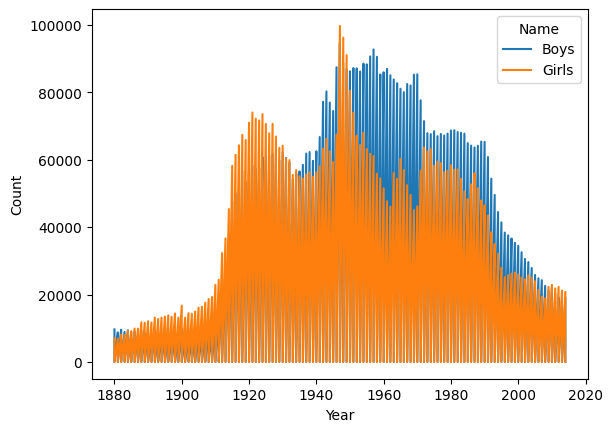

In [114]:
import matplotlib.pyplot as plt

boys_data = data[(data['Gender'] == 'M')]
girls_data = data[(data['Gender'] == 'F')]

plt.plot(boys_data['Year'], boys_data['Count'], label='Boys')
plt.plot(girls_data['Year'], girls_data['Count'], label='Girls')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Name')

plt.show()

### 20.Count the number of gender-neutral names (the same for girls and boys)

In [115]:
num_of_years = len(data['Year'].unique())
male_names = data[data['Gender'] == 'M'].groupby(['Name'])['Count'].sum()
female_names = data[data['Gender'] == 'F'].groupby(['Name'])['Count'].sum()

gender_neutral_names = male_names.index.intersection(female_names.index)
pd.DataFrame(data=gender_neutral_names).size

10221

### 21.Count how many times the boys were called Barbara

In [116]:
data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum()

4139

### 23.Know the most popular gender-neutral names (those present each year)

In [117]:
num_of_years = len(data['Year'].unique())
male_names = data[data['Gender'] == 'M'].groupby(['Name'])['Count'].sum()
female_names = data[data['Gender'] == 'F'].groupby(['Name'])['Count'].sum()
gender_neutral_names = male_names.index.intersection(female_names.index)
popular_gender_neutral_names = data[data['Name'].isin(gender_neutral_names)].groupby('Name').filter(lambda x: x['Year'].nunique() == num_of_years)['Name'].unique()
pd.DataFrame(data=popular_gender_neutral_names)

,0
0,Mary
1,Anna
2,Emma
3,Elizabeth
4,Minnie
...,...
818,Noble
819,Rupert
820,Thad
821,Kelly


### 25. Plot the distribution graphs of the number of names John and Mary by years regardless of gender.

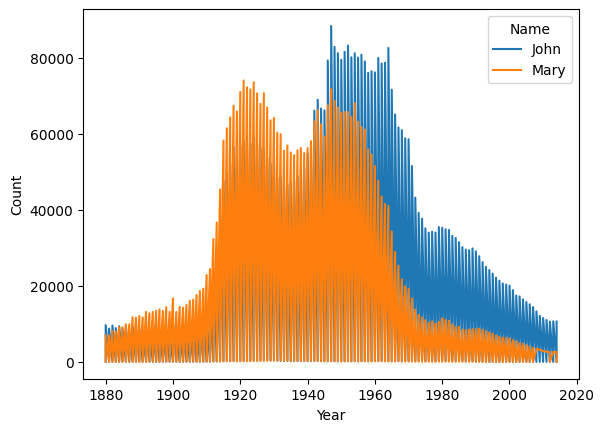

In [118]:
import matplotlib.pyplot as plt

john_data = data[(data['Name'] == 'John')]
mary_data = data[(data['Name'] == 'Mary')]

plt.plot(john_data['Year'], john_data['Count'], label='John')
plt.plot(mary_data['Year'], mary_data['Count'], label='Mary')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Name')

plt.show()